# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 
## Homework 2 - Clustering




**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors**: Mark Glickman, Pavlos Protopapas, & Chris Tanner 


<hr style="height:2pt">

### Homework 2 is due February 20th

In [1]:
#PLEASE RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- This is individual homework - No collaboration/Groups
- Problem 1 + Problem 2 = 75 points ; Problem 3 = 25 points
- To submit your assignment, please follow the instructions on Canvas.
- Please restart the kernel and run the entire notebook again before you submit.

<hr style="height:2pt">

### Please use the libraries below:

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import KMeans
from gap_statistic import OptimalK
from sklearn.datasets.samples_generator import make_blobs


<hr style="height:2pt">

<div class="theme">*Handy* Algorithms </div>


    
In this assignment, you will be working with data collected from a motion capture camera system. The system was used to record 14 different users performing 5 distinct hand postures with markers attached to a left-handed glove. A set of markers on the back of the glove was used to establish a local coordinate system for the hand, and 8 additional markers were attached to the thumb and fingers of the glove. A total of 24 features were collected based on observations from the camera system. Two other variables in the dataset were the ID of the user and the posture that the user made.

These data have been preprocessed, including transformation to the local coordinate system of the record, removal of outliers, and removal of missing data.

The dataset `postures_clean.csv` contains 38,943 rows and 26 columns. Each row corresponds to a single frame as captured by the camera system. The data are represented in the following manner:

`Class (type: Integer). The hand posture of the given observation, with`

`1 = Fist (with thumb out)`

`2 = Stop (hand flat)`

`3 = Point1 (point with index finger)`

`4 = Point2 (point with index and middle fingers)`

`5 = Grab (fingers curled as if to grab)`

`User (type: Integer). The ID of the user that contributed the record.`

`X0, Y0, Z0, X1, Y1, Z1,..., X7, Y7, Z7 (type: Real). The x-coordinate, y-coordinate, and z-coordinate of the eight unlabeled marker positions.`


Start by reading the dataset into a pandas data frame.

In [3]:
handy = pd.read_csv("../data/postures_clean.csv")
print(handy.shape)
handy.head()

(38943, 26)


,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
0,1,0,72.692270,50.023771,-72.963253,-11.593076,81.234142,-28.450210,51.729995,82.844469,...,-47.909511,10.028439,88.967979,-32.045120,7.732511,25.135415,10.723395,55.943868,19.513363,-70.380124
1,1,0,85.648015,73.561022,-71.838316,31.595034,90.217896,-47.246688,52.230858,82.361548,...,-25.243914,10.277516,88.607958,-32.037539,56.308829,18.774768,-70.996523,6.913199,24.967750,9.697553
2,1,0,-10.346977,81.751331,-25.587870,33.414886,91.985986,-41.364447,5.625100,24.523349,...,-67.660208,87.019172,75.505188,-67.462052,56.807276,20.950953,-68.375831,11.602112,89.400536,-29.062279
3,2,0,63.554969,98.490988,11.165920,49.159831,154.330730,32.004168,92.793124,137.143202,...,-74.307346,58.421362,27.499634,-71.713081,12.660462,95.077144,29.664434,84.110115,151.545456,16.891147
4,2,0,80.873812,93.722537,-4.988816,63.572103,98.476638,11.242908,49.142700,154.347050,...,-71.629823,20.573646,132.913455,35.349247,92.942044,137.182817,1.297511,35.480104,99.739019,22.802243


In [4]:
handy.info() # verify data types as expected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38943 entries, 0 to 38942
Data columns (total 26 columns):
Class    38943 non-null int64
User     38943 non-null int64
X0       38943 non-null float64
Y0       38943 non-null float64
Z0       38943 non-null float64
X1       38943 non-null float64
Y1       38943 non-null float64
Z1       38943 non-null float64
X2       38943 non-null float64
Y2       38943 non-null float64
Z2       38943 non-null float64
X3       38943 non-null float64
Y3       38943 non-null float64
Z3       38943 non-null float64
X4       38943 non-null float64
Y4       38943 non-null float64
Z4       38943 non-null float64
X5       38943 non-null float64
Y5       38943 non-null float64
Z5       38943 non-null float64
X6       38943 non-null float64
Y6       38943 non-null float64
Z6       38943 non-null float64
X7       38943 non-null float64
Y7       38943 non-null float64
Z7       38943 non-null float64
dtypes: float64(24), int64(2)
memory usage: 7.7 MB


In [5]:
handy.describe() 
# eyeballing to see if anything stands out for preprocessing

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
count,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,...,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000,38943.000000
mean,3.533986,8.149501,51.392252,93.748418,-18.956761,48.644293,97.228337,-16.921813,46.432265,97.351512,...,-18.446645,45.392642,93.295433,-19.125065,45.201114,90.839851,-19.920157,44.463433,88.463343,-20.368719
std,1.332452,4.587195,34.070402,40.145995,34.976568,34.922596,38.076977,34.671422,36.395332,37.470755,...,35.597032,37.104094,39.746619,35.602273,37.556616,40.227409,34.827888,38.378395,40.503378,33.943957
min,1.000000,0.000000,-108.552738,-67.157904,-120.284665,-111.685241,-65.758453,-120.290858,-99.917453,-64.830342,...,-157.199089,-99.014815,-64.282645,-118.328399,-100.084275,-67.283707,-153.449813,-108.605639,-64.972157,-113.733105
25%,2.000000,5.000000,28.169252,74.946345,-43.598807,22.574182,79.747406,-41.210343,17.617698,81.302159,...,-45.169035,15.849890,76.376404,-46.363837,15.132050,68.915784,-46.547792,13.081363,63.541846,-45.676522
50%,4.000000,9.000000,54.596564,93.966079,-15.041397,52.960933,96.690641,-12.046916,51.184849,97.222693,...,-14.823751,50.160084,97.040377,-16.010237,49.968499,95.562441,-17.101080,49.601058,93.796334,-19.428819
75%,5.000000,12.000000,77.390834,130.932659,7.998678,75.560564,131.729311,9.065824,74.435194,130.794462,...,9.382799,73.761617,126.844621,9.031498,74.558859,123.069653,7.767866,75.721811,119.188963,6.591351
max,5.000000,14.000000,160.850926,169.175464,113.345119,158.783454,170.209350,104.697852,163.547310,168.186466,...,119.237203,180.563322,167.926171,110.898899,176.409004,168.598384,117.914907,189.221529,169.127359,117.815967


<div class='exercise'>Problem 1: Clustering with k-means </div>

(a) After appropriate pre-processing (but not scaling) run the k-means clustering algorithm, using the `KMeans` class from sklearn.cluster, with the number of clusters corresponding to the number of users, `n_init` of 46, and 109 as the random seed. Add the result as a new column called `Cluster14` to your data frame.

In [6]:
# run kmeans
handy_kmeans = KMeans(n_clusters = 14, init = 'random', n_init = 46, random_state = 109).fit(handy.drop(['Class', 'User'], axis = 1))


In [7]:
# add kmeans 14 cluster labels to original df
handy.insert(2,'Cluster14', handy_kmeans.labels_)
handy.head()

,Class,User,Cluster14,X0,Y0,Z0,X1,Y1,Z1,X2,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
0,1,0,6,72.692270,50.023771,-72.963253,-11.593076,81.234142,-28.450210,51.729995,...,-47.909511,10.028439,88.967979,-32.045120,7.732511,25.135415,10.723395,55.943868,19.513363,-70.380124
1,1,0,6,85.648015,73.561022,-71.838316,31.595034,90.217896,-47.246688,52.230858,...,-25.243914,10.277516,88.607958,-32.037539,56.308829,18.774768,-70.996523,6.913199,24.967750,9.697553
2,1,0,10,-10.346977,81.751331,-25.587870,33.414886,91.985986,-41.364447,5.625100,...,-67.660208,87.019172,75.505188,-67.462052,56.807276,20.950953,-68.375831,11.602112,89.400536,-29.062279
3,2,0,3,63.554969,98.490988,11.165920,49.159831,154.330730,32.004168,92.793124,...,-74.307346,58.421362,27.499634,-71.713081,12.660462,95.077144,29.664434,84.110115,151.545456,16.891147
4,2,0,4,80.873812,93.722537,-4.988816,63.572103,98.476638,11.242908,49.142700,...,-71.629823,20.573646,132.913455,35.349247,92.942044,137.182817,1.297511,35.480104,99.739019,22.802243


(b) Use the function below to visualize the results for k-means on a random sample of 2,000 observations (it will take the sample for you). Does 14 clusters seem to make sense?

In [8]:
from sklearn.decomposition import PCA

def plot_clusters(full_data, group_col, scaling_mode):
    marker_types = [".", "v", "1", "^", "s", "p", "P", "3", "H", "<", "|", "_", "x", "*"]
    marker_colors = np.concatenate([np.array(plt.cm.tab10.colors),np.array(plt.cm.Pastel1.colors)])
    
    feature_columns = [colname for colname in list(full_data.columns) if colname not in {'Class','User','Cluster14','Cluster5'}]
    features_only = full_data[feature_columns]
    
    # make a scaled df if needed, (but don't scale cluster labels)
    if scaling_mode == True:
        scaler = StandardScaler()
        scaled_features = pd.DataFrame(scaler.fit_transform(features_only), columns=feature_columns)
    elif scaling_mode == False:
        scaled_features = features_only
    else:
        raise ValueError("Unexpected value for scaling_mode")

    # fit PCA to the whole scaled data
    fitted_pca = PCA().fit(scaled_features)

    # take a sample of the whole scaled data
    scaled_sample = scaled_features.sample(2000, random_state=109)

    # apply the PCA transform on the sample
    pca_sample = pd.DataFrame(fitted_pca.transform(scaled_sample), columns = ["PCA{}".format(i) for i in range(len(scaled_sample.columns.values))])
    pca_sample.index = scaled_sample.index ### New statement
    
    # re-include a cluster label for the pca data
    if 'Cluster14' in full_data.columns.values:
        pca_sample['Cluster14'] = full_data.loc[pca_sample.index, "Cluster14"].values
    if 'Cluster5' in full_data.columns.values:
        pca_sample['Cluster5'] = full_data.loc[pca_sample.index, "Cluster5"]
    
    plt.figure(figsize=(11,8.5))
    for i, (cluster_id, cur_df) in enumerate(pca_sample.groupby([group_col])):

        pca1_scores = cur_df.iloc[:,0]
        pca2_scores = cur_df.iloc[:,1]
        plt.scatter(pca1_scores, pca2_scores, label=cluster_id, c=marker_colors[i].reshape(1,-1), marker=marker_types[i])

    plt.xlabel("PC1 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[0],1)))
    plt.ylabel("PC2 ({}%)".format(np.round(100*fitted_pca.explained_variance_ratio_[1],1)))
    plt.legend()
    plt.show()

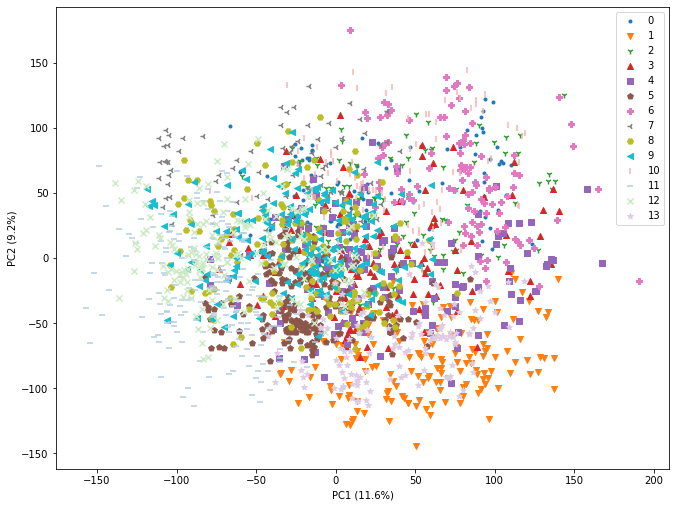

In [9]:
plot_clusters(handy, 'Cluster14', False) 

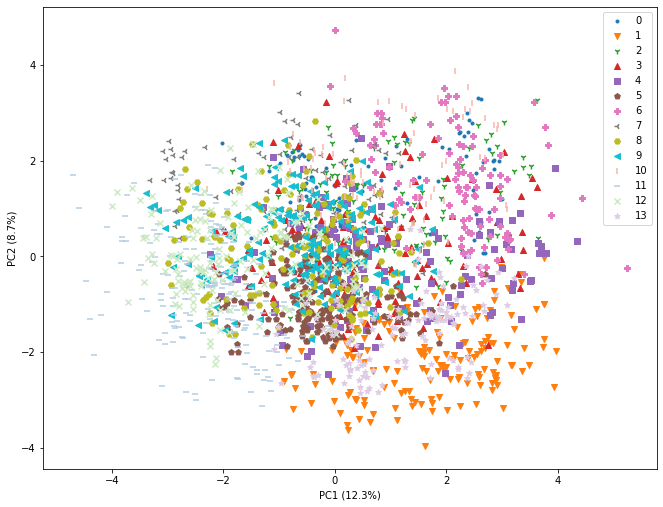

In [10]:
plot_clusters(handy, 'Cluster14', True) # to check if scaling makes a difference

### Comment 1b

* There appears to be no clear cluster in the visualization of the 2000 sample points. 
* Most of the points are overlapping with no clear demarcation
* Scaling the data does not add any value; the plot is the same while the only change is in the dimensions of the axes.

(c) Plot the silhouette scores using the function below, from lecture. Give it a 10% sample of the data to speed the visualization. How reasonable does the clustering seem based on this plot? How does it compare to the information in the plot above?

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
#modified code from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

def silplot(X, cluster_labels, clusterer, pointlabels=None):
    n_clusters = clusterer.n_clusters
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(11,8.5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = ", n_clusters,
          ", the average silhouette_score is ", silhouette_avg,".",sep="")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(0,n_clusters+1):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=200, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    xs = X[:, 0]
    ys = X[:, 1]
    
    if pointlabels is not None:
        for i in range(len(xs)):
            plt.text(xs[i],ys[i],pointlabels[i])

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % int(i), alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [12]:
handy_10pct1c = handy.sample(frac = 0.1, random_state = 109)
display(handy_10pct1c.head(n=2))


,Class,User,Cluster14,X0,Y0,Z0,X1,Y1,Z1,X2,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
6091,2,2,1,84.975631,135.157968,0.178227,102.782250,65.801284,-54.513788,96.923428,...,-103.248612,71.888221,86.550350,-9.536883,62.418378,150.673209,13.239986,31.619131,147.040932,20.974022
67,2,0,9,97.433559,73.307004,-70.852885,12.156341,94.997037,28.826597,49.407735,...,10.082917,91.896413,137.364909,-0.970175,80.472245,54.351745,-70.605996,20.571867,132.825532,34.975527


For n_clusters = 14, the average silhouette_score is 0.06494142194175812.


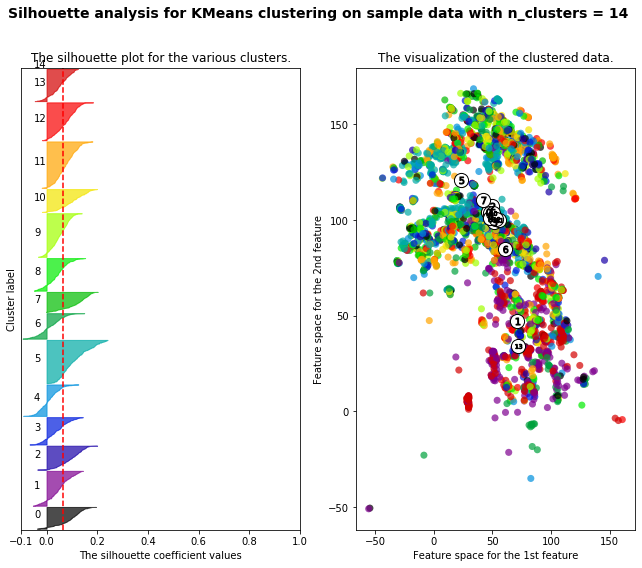

In [14]:
silplot(handy_10pct1c.drop(['Class', 'User', 'Cluster14'], axis = 1).values, handy_10pct1c.Cluster14, handy_kmeans, pointlabels=None)


### Comment 1c

* The clustering does not seem reasonable
* Average silhouette score is very low at 0.065 which indicates that the clustering is of lower quality.
* Nearly all silplot values in the left chart have some negative values which also indicates that the clusters are mismatched
* The chart on the right also indicates that the cluster centroids are concentrated and overallping for many clusters.
* There are no clear cluster groups and the points are overlapping which is indicates that the clustering is not of very high quality.
* The conclusions are similar to and support the PCA plot in 1b above.

(d) Repeat all of the above steps, but attempting to group by posture rather than by user. That is : 

(i) Run the k-means algorithm with 5 centroids instead of 14, creating a variable named `Cluster5` and adding it to the dataset. 

(ii) Visualize the results for k-means. Does 5 clusters seem to make sense from this plot?

(iii) Plot the silhouette scores on a 10% sample of the data. How reasonable does the clustering seem based on this plot?

,Class,User,Cluster14,Cluster5,X0,Y0,Z0,X1,Y1,Z1,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
0,1,0,6,0,72.692270,50.023771,-72.963253,-11.593076,81.234142,-28.450210,...,-47.909511,10.028439,88.967979,-32.045120,7.732511,25.135415,10.723395,55.943868,19.513363,-70.380124
1,1,0,6,2,85.648015,73.561022,-71.838316,31.595034,90.217896,-47.246688,...,-25.243914,10.277516,88.607958,-32.037539,56.308829,18.774768,-70.996523,6.913199,24.967750,9.697553


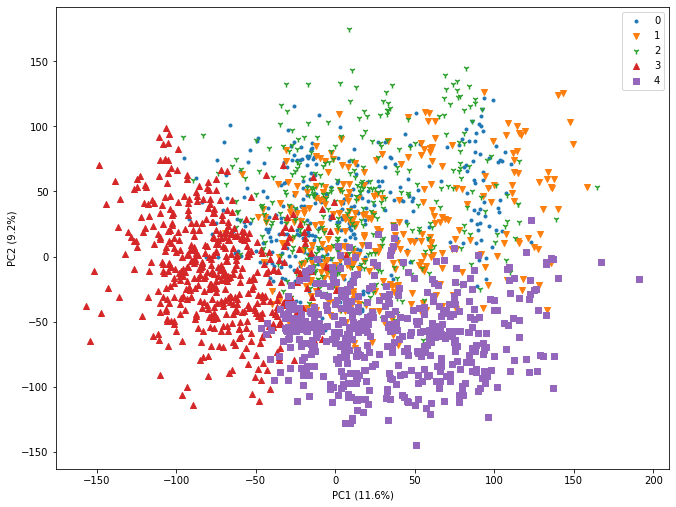

,Class,User,Cluster14,Cluster5,X0,Y0,Z0,X1,Y1,Z1,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
8827,2,5,8,3,34.708221,149.687091,34.822150,18.871564,142.149422,39.367748,...,14.979920,54.036947,27.127454,-45.814584,5.542334,117.714873,36.526294,28.136980,95.310909,13.441464
16448,5,8,4,4,34.981128,85.133177,28.835899,58.438436,23.113196,-83.390086,...,17.875359,-5.222746,89.526664,25.694766,-13.384244,130.460703,10.752341,64.321907,146.300335,14.107448


For n_clusters = 5, the average silhouette_score is 0.07331081643691571.


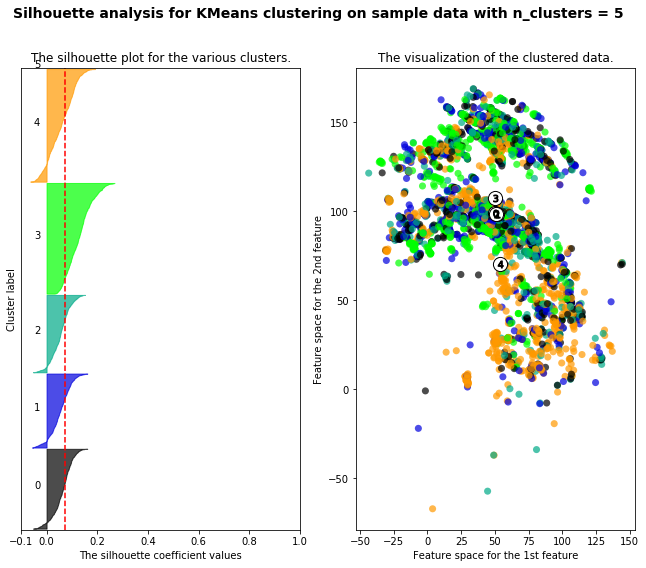

In [15]:
# run kmeans
handy_kmeans2 = KMeans(n_clusters = 5, init = 'random', n_init = 46, random_state = 109).fit(handy.drop(['Class', 'User', 'Cluster14'], axis = 1))

# add kmeans labels to original df
handy.insert(3,"Cluster5", handy_kmeans2.labels_)
display(handy.head(n=2))

plot_clusters(handy, handy.Cluster5, False)

handy_10pct_1c = handy.sample(frac = 0.1)
display(handy_10pct_1c.head(n=2))

silplot(handy_10pct_1c.drop(['Class', 'User', 'Cluster14', 'Cluster5'], axis = 1).values, handy_10pct_1c.Cluster5, handy_kmeans2, pointlabels=None)


Visualize the results for k-means. Does 5 clusters seem to make sense from this plot?

(iii) Plot the silhouette scores on a 10% sample of the data. How reasonable does the clustering seem based on this plot?

### Comment 1d

* PCA plots for 5 clusters are much better than those for 14 clusters 
* Cluster 1,3,4 are visible in the PCA Plot while clusters 0 & 2 are fairly close


* The silhouette score for 5 clusters is marginally higher at 0.073 as compared to 0.065 for 14 clusters
* This suggests that on a relative basis the clustering is better but not very good overall.
* The presence of negative silhouette scores across all clusters except for cluster 3 also point to the quality of clsutering not being great.
* The close centers of clusters in the feature space plots also support this.


* Overall, 5 clusters are relatively better than 14 but the actual results of clustering are still not great.

(e) What do the results suggest? Does this make sense in the context of what we know about the problem?

### Comment 1e

* The results definetely point to the presence of less than 14 clusters in the data.
* Basis the results of clustering alone, and ignoring what we know about the data we can conclude that the number of clusters is around 5 give or take a couple of clusters.
* When we add in what we know about the data, that the data represents 5 hand gestures by 14 users we can conclude that 5 clusters is more viable
* Each hand gesture will have a distinctive motion which would slightly vary depending on the comfort level of the user with the gesture.
* Another potential explanation for lack of clarity in the clustering could be that the data is for left hand glove and right handed users may not be as comfortable with gesture motions leading to input data being unclear. 

<div class='exercise'> <b> Problem 2: Other Ks  </b> </div>

In the previous problem, we examined the results of running k-means with 5 and 14 centroids on the postures data. In this problem, we will investigate a broader range of possible cluster sizes, with a borader range of metrics. 

**For all of these questions, you should work with a sample of 2,000 data points drawn with `pd.sample` and a random seed of 109.**

(a) Use the elbow method to evaluate the best choice of the number of clusters, plotting the total within-cluster variation against the number of clusters, for k-means clustering with $k \in \{1,2,...,15\}.$
 

In [16]:
handy_q2 = handy.sample(2000, random_state = 109)
handy_q2.head(n=2)

,Class,User,Cluster14,Cluster5,X0,Y0,Z0,X1,Y1,Z1,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
6091,2,2,1,4,84.975631,135.157968,0.178227,102.782250,65.801284,-54.513788,...,-103.248612,71.888221,86.550350,-9.536883,62.418378,150.673209,13.239986,31.619131,147.040932,20.974022
67,2,0,9,2,97.433559,73.307004,-70.852885,12.156341,94.997037,28.826597,...,10.082917,91.896413,137.364909,-0.970175,80.472245,54.351745,-70.605996,20.571867,132.825532,34.975527


In [17]:
kval = range(1,16)
wc_ss = []

for i in kval:
    fitx = KMeans(n_clusters = i, init = 'random', n_init = 5, random_state = 109).fit((handy_q2.drop(['Class', 'User', 'Cluster14', 'Cluster5'], axis = 1)))
    wc_ss.append(fitx.inertia_)


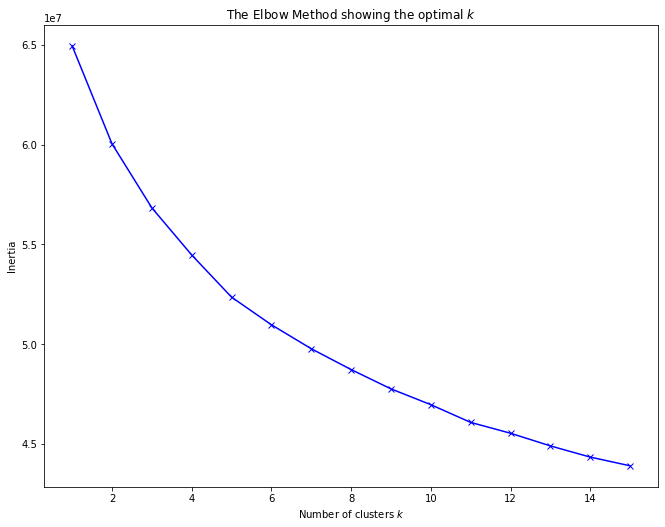

In [18]:
plt.figure(figsize=(11,8.5))
plt.plot(range(1,16), wc_ss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

(b) Use the average silhouette to evaluate the choice of the number of clusters for k-means clustering with $k \in \{1,2,...,15\}$. Plot the results. 

In [19]:
sil_kval = range(2,16)
sil_avg = []

for i in sil_kval:
    fitx = KMeans(n_clusters = i, init = 'random', n_init = 5, random_state = 109).fit((handy_q2.drop(['Class', 'User', 'Cluster14', 'Cluster5'], axis = 1)))
    sil_avg.append(silhouette_score(handy_q2.drop(['Class', 'User', 'Cluster14', 'Cluster5'], axis = 1).values, fitx.labels_))  


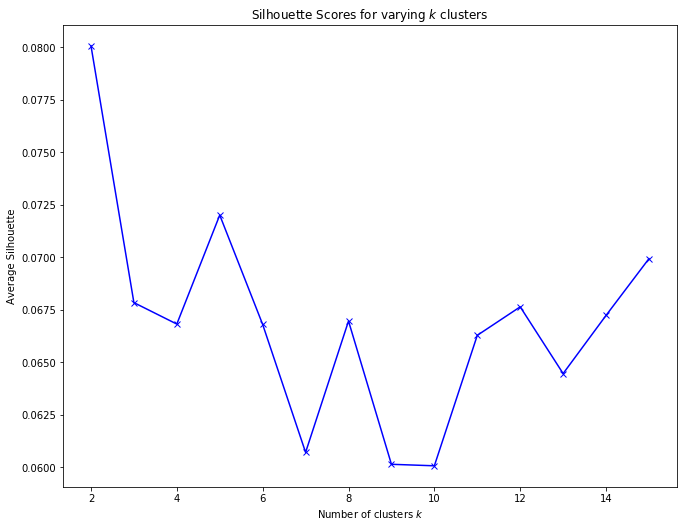

In [20]:
plt.figure(figsize=(11,8.5))
plt.plot(range(2,16), np.array(sil_avg), 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('Silhouette Scores for varying $k$ clusters')
plt.show()

(c) Use the gap statistic to evaluate the choice of the number of clusters for k-means clustering with $k \in \{1,2,..,15\}$. Plot the results. 

Optimal clusters:  14


,n_clusters,gap_value,gap*,ref_dispersion_std,diff,diff*
0,1.0,-9.707356,-1.280218e+08,21.822903,-0.049487,1.088257e+08
1,2.0,-9.655173,-1.178375e+08,20.161801,-0.029777,1.066289e+08
2,3.0,-9.622715,-1.116775e+08,19.624119,-0.014350,1.050029e+08
3,4.0,-9.605096,-1.078039e+08,23.526810,-0.020180,1.010008e+08
4,5.0,-9.581881,-1.038854e+08,21.512928,-0.014027,9.869842e+07
5,6.0,-9.564721,-1.007905e+08,21.942196,-0.011146,9.667450e+07
6,7.0,-9.550243,-9.824370e+07,23.073414,-0.002828,9.609076e+07
7,8.0,-9.544126,-9.668619e+07,22.542132,0.007074,9.662184e+07
8,9.0,-9.548447,-9.617552e+07,18.695332,-0.015496,9.193392e+07
9,10.0,-9.529630,-9.358909e+07,22.374579,-0.001627,9.225609e+07


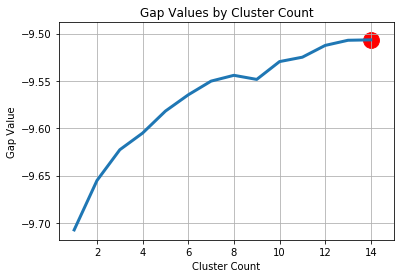

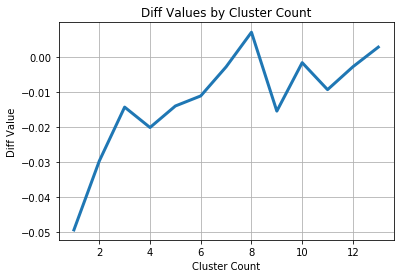

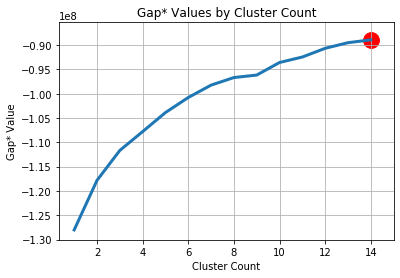

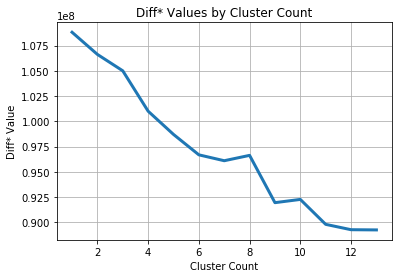

In [22]:
gs_obj = OptimalK()

n_clusters = gs_obj(handy_10pct_1c.drop(['Class', 'User', 'Cluster14', 'Cluster5'], axis = 1).values, 
                    n_refs = 50, cluster_array = np.arange(1,15)  )

print('Optimal clusters: ', n_clusters)

display(gs_obj.gap_df)

gs_obj.plot_results()


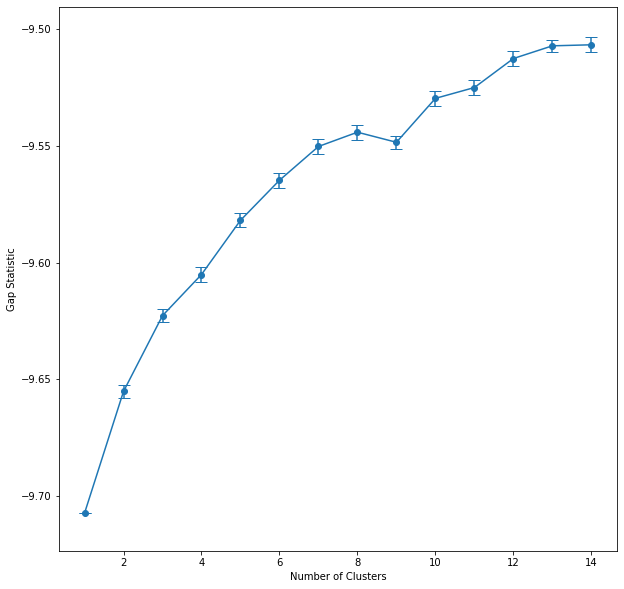

In [23]:
def display_gapstat_with_errbars(gap_df):
    gaps = gap_df["gap_value"].values
    diffs = gap_df["diff"]
    
    err_bars = np.zeros(len(gap_df))
    err_bars[1:] = diffs[:-1] - gaps[:-1] + gaps[1:]

    plt.figure(figsize = (10,10))
    plt.scatter(gap_df["n_clusters"], gap_df["gap_value"])
    plt.errorbar(gap_df["n_clusters"], gap_df["gap_value"], yerr=err_bars, capsize=6)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Gap Statistic")
    plt.show()
    
display_gapstat_with_errbars(gs_obj.gap_df)

(d) After analyzing the plots produced by all three of these measures, discuss the number of k-means clusters that you think is the best fit for this dataset. Defend your answer with evidence from the previous parts of this question, the three graphs produced here, and what you surmise about this dataset.

### Comment 2d

All measures give us varying answers

**Elbow**
* The elbow plot is quite smooth and there is no clear direction that is visible
* However, there are slight bends at K=5 and at K=11

**Silhouette**
* The silhouette scores are very low overall.
* They vary between the range of 0.06 to 0.08
* The highest score is for 2 clusters but it is not conclusive due to the low overall score
* The next highest value is for K=5 at 0.0725

**Gap Statistic**
* The Gap statistic plots point to 14 clusters when we run OptimalK
* When we look at the plot of gap statistic with number of clusters; we see that the gap statistic of K=8 is bigger than the error bar of K=9.

**Overall Conclusion**
* Elbow and Silhouette are informal methods and are giving us varied results
* Gap statistic is a more experimental method though it gives 2 results.
* While different plots give us different conclusions, we can see that there is a congruence in the 5 or 6 clusters range from the Elbow and error bar plot; the silhouette scores are also 2nd highest at this point.
* From the description we know that the data is for 5 different types of hand gestures.
* Basis the results of Q2 alone and with our knowledge of the data we would conclude that k=5 is appropriate.

<div class='exercise'> <b> Problem 3: Alternative Algorithms  </b> </div>

(e) Run DBSCAN on the data. How many clusters are found, and how well does this clustering perform on e.g. silhouette score, excluding the points not assigned to any cluster?  
*Note*: Do not use a sample of the data. Running the algorithm may take up to 5-10 minutes.

In [24]:
print(handy.shape)
handy.head(n=2)

(38943, 28)


,Class,User,Cluster14,Cluster5,X0,Y0,Z0,X1,Y1,Z1,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
0,1,0,6,0,72.692270,50.023771,-72.963253,-11.593076,81.234142,-28.450210,...,-47.909511,10.028439,88.967979,-32.045120,7.732511,25.135415,10.723395,55.943868,19.513363,-70.380124
1,1,0,6,2,85.648015,73.561022,-71.838316,31.595034,90.217896,-47.246688,...,-25.243914,10.277516,88.607958,-32.037539,56.308829,18.774768,-70.996523,6.913199,24.967750,9.697553


In [25]:
# function to plot distances with values of K

def plot_epsilon(df, min_samples):
    fitted_neigbors = NearestNeighbors(n_neighbors=min_samples).fit(df)
    distances, indices = fitted_neigbors.kneighbors(df)
    dist_to_nth_nearest_neighbor = distances[:,-1]
    plt.plot(np.sort(dist_to_nth_nearest_neighbor))
    plt.xlabel("Index\n(sorted by increasing distances)")
    plt.ylabel("{}-NN Distance (epsilon)".format(min_samples-1))
    plt.tick_params(right=True, labelright=True)

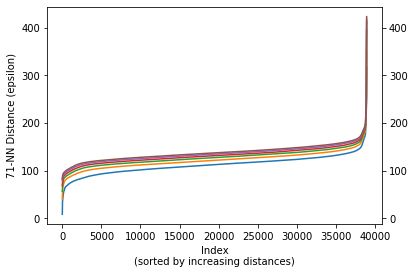

In [26]:
# Experiment with different ranges of min_points around 2X the number of features
# as we can see below, the range does not vary significantly

for i in (12,24,36,48,60,72):
    plot_epsilon(handy.drop(['Class', 'User', 'Cluster14', 'Cluster5'], axis = 1).values, i)
    

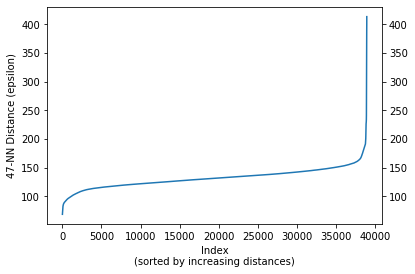

In [27]:
# since there was no significant variation we proceed with 2X features = 48 min_points; eps value comes out at 160

plot_epsilon(handy.drop(['Class', 'User', 'Cluster14', 'Cluster5'], axis = 1).values, 48)

In [28]:
# run DBSCAN with values determined from above
fitted_dbscan1 = DBSCAN(eps = 160, min_samples = 48).fit(handy.drop(['Class', 'User', 'Cluster14', 'Cluster5'], axis = 1).values)


In [29]:
lab1 = fitted_dbscan1.labels_
lab1_val = lab1[lab1 >= 0]
print(set(lab1_val))
len(lab1[lab1 >= 0]), len(lab1) # drop unassigned labels; compare lengths to make sure


{0}


(38733, 38943)

In [30]:
# eps = 160 gives only 1 cluster; hence we try different values of eps; 
# since there is not much change in the distance with different values of min_samples we retain 48

# run DBSCAN with values eps = 140
fitted_dbscan2 = DBSCAN(eps = 140, min_samples = 48).fit(handy.drop(['Class', 'User', 'Cluster14', 'Cluster5'], axis = 1).values)

lab2 = fitted_dbscan2.labels_
lab2_val = lab2[lab2 >= 0]
print(set(lab2_val))
len(lab2[lab2 >= 0]), len(lab2) # drop unassigned labels; compare lengths to make sure

# eps = 140 gives 1 cluster; we continue to try different values of eps; 

{0}


(37907, 38943)

In [31]:
# run DBSCAN with values eps = 120
# since there is not much change in the distance with different values of min_samples we retain 48

fitted_dbscan3 = DBSCAN(eps = 120, min_samples = 48).fit(handy.drop(['Class', 'User', 'Cluster14', 'Cluster5'], axis = 1).values)

lab3 = fitted_dbscan3.labels_
lab3_val = lab3[lab3 >= 0]
print(set(lab3_val))
len(lab3[lab3 >= 0]), len(lab3) # drop unassigned labels; compare lengths to make sure

# returns 9 clusters with about 60% of the data being assigned to a cluster
# proceed to calculate silhouette score since this seems acceptable

{0, 1, 2, 3, 4, 5, 6, 7, 8}


(23554, 38943)

In [32]:
handy_dbscan_120 = handy.copy()
handy_dbscan_120.head(n=2)

,Class,User,Cluster14,Cluster5,X0,Y0,Z0,X1,Y1,Z1,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
0,1,0,6,0,72.692270,50.023771,-72.963253,-11.593076,81.234142,-28.450210,...,-47.909511,10.028439,88.967979,-32.045120,7.732511,25.135415,10.723395,55.943868,19.513363,-70.380124
1,1,0,6,2,85.648015,73.561022,-71.838316,31.595034,90.217896,-47.246688,...,-25.243914,10.277516,88.607958,-32.037539,56.308829,18.774768,-70.996523,6.913199,24.967750,9.697553


In [33]:
handy_dbscan_120.insert(4,'eps_120', lab3)
print(handy_dbscan_120.shape)
handy_dbscan_120.head(n=2)

(38943, 29)


,Class,User,Cluster14,Cluster5,eps_120,X0,Y0,Z0,X1,Y1,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
0,1,0,6,0,-1,72.692270,50.023771,-72.963253,-11.593076,81.234142,...,-47.909511,10.028439,88.967979,-32.045120,7.732511,25.135415,10.723395,55.943868,19.513363,-70.380124
1,1,0,6,2,-1,85.648015,73.561022,-71.838316,31.595034,90.217896,...,-25.243914,10.277516,88.607958,-32.037539,56.308829,18.774768,-70.996523,6.913199,24.967750,9.697553


In [34]:
handy_dbscan_sil120 = handy_dbscan_120[handy_dbscan_120.eps_120 != -1]
print(handy_dbscan_sil120.shape)
handy_dbscan_sil120.head(n=2)

(23554, 29)


,Class,User,Cluster14,Cluster5,eps_120,X0,Y0,Z0,X1,Y1,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
4,2,0,4,3,1,80.873812,93.722537,-4.988816,63.572103,98.476638,...,-71.629823,20.573646,132.913455,35.349247,92.942044,137.182817,1.297511,35.480104,99.739019,22.802243
5,2,0,2,0,1,80.775150,93.705283,-5.090904,63.479609,98.429524,...,1.487330,95.261862,73.719164,-74.222778,20.499495,132.863377,35.309544,58.297882,27.583892,-71.888449


In [35]:
score_120 = silhouette_score(handy_dbscan_sil120.drop(['Class', 'User', 'Cluster14', 'Cluster5','eps_120'], axis = 1).values, lab3_val)
score_120 # -ve silhouette score means that we need to further work

-0.013989327771733158

In [36]:
# run DBSCAN with values eps = 100
# since there is not much change in the distance with different values of min_samples we retain 48

fitted_dbscan4 = DBSCAN(eps = 100, min_samples = 48).fit(handy.drop(['Class', 'User', 'Cluster14', 'Cluster5'], axis = 1).values)

lab4 = fitted_dbscan4.labels_
lab4_val = lab4[lab4 >= 0]
print(set(lab4_val))
len(lab4[lab4 >= 0]), len(lab4) # drop unassigned labels; compare lengths to make sure

# returns 5 clusters but <10% of the values are assigned to a cluster; calculate silhouette score

{0, 1, 2, 3, 4, 5}


(2919, 38943)

In [37]:
handy_dbscan_100 = handy.copy()
handy_dbscan_100.head(n=2)

,Class,User,Cluster14,Cluster5,X0,Y0,Z0,X1,Y1,Z1,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
0,1,0,6,0,72.692270,50.023771,-72.963253,-11.593076,81.234142,-28.450210,...,-47.909511,10.028439,88.967979,-32.045120,7.732511,25.135415,10.723395,55.943868,19.513363,-70.380124
1,1,0,6,2,85.648015,73.561022,-71.838316,31.595034,90.217896,-47.246688,...,-25.243914,10.277516,88.607958,-32.037539,56.308829,18.774768,-70.996523,6.913199,24.967750,9.697553


In [38]:
handy_dbscan_100.insert(4,'eps_100', lab4)
print(handy_dbscan_100.shape)
handy_dbscan_100.head(n=2)

(38943, 29)


,Class,User,Cluster14,Cluster5,eps_100,X0,Y0,Z0,X1,Y1,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
0,1,0,6,0,-1,72.692270,50.023771,-72.963253,-11.593076,81.234142,...,-47.909511,10.028439,88.967979,-32.045120,7.732511,25.135415,10.723395,55.943868,19.513363,-70.380124
1,1,0,6,2,-1,85.648015,73.561022,-71.838316,31.595034,90.217896,...,-25.243914,10.277516,88.607958,-32.037539,56.308829,18.774768,-70.996523,6.913199,24.967750,9.697553


In [39]:
handy_dbscan_sil100 = handy_dbscan_100[handy_dbscan_100.eps_100 != -1]
print(handy_dbscan_sil100.shape)
handy_dbscan_sil100.head(n=2)

(2919, 29)


,Class,User,Cluster14,Cluster5,eps_100,X0,Y0,Z0,X1,Y1,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
1126,2,0,12,0,0,73.911615,92.181021,-8.774080,-3.489676,119.437432,...,21.651747,52.247650,97.434013,6.279735,25.654382,95.009581,17.618638,65.562567,11.639463,-72.873162
1358,2,0,11,3,0,73.736592,91.776744,-8.087564,26.081092,94.983953,...,12.469724,36.453359,141.995582,46.098092,-1.565689,86.919698,24.022842,-3.245320,118.524529,44.511494


In [40]:
score_100 = silhouette_score(handy_dbscan_sil100.drop(['Class', 'User', 'Cluster14', 'Cluster5','eps_100'], axis = 1).values, lab4_val)
score_100 # we get a +ve score of 0.16

0.1605338361334923

In [41]:
# run DBSCAN with values eps = 110, min_samples = 48
# since less than 10% of points are classified we try to with eps at 110

fitted_dbscan5 = DBSCAN(eps = 110, min_samples = 48).fit(handy.drop(['Class', 'User', 'Cluster14', 'Cluster5'], axis = 1).values)

lab5 = fitted_dbscan5.labels_
lab5_val = lab5[lab5 >= 0]
print(set(lab5_val))
len(lab5[lab5 >= 0]), len(lab5) # drop unassigned labels; compare lengths to make sure

# returns 18 clusters with ~23% of data assigned to cluster; calculate silhouette score

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}


(8961, 38943)

In [42]:
handy_dbscan_100x = handy.copy()
handy_dbscan_100x.head(n=2)

,Class,User,Cluster14,Cluster5,X0,Y0,Z0,X1,Y1,Z1,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
0,1,0,6,0,72.692270,50.023771,-72.963253,-11.593076,81.234142,-28.450210,...,-47.909511,10.028439,88.967979,-32.045120,7.732511,25.135415,10.723395,55.943868,19.513363,-70.380124
1,1,0,6,2,85.648015,73.561022,-71.838316,31.595034,90.217896,-47.246688,...,-25.243914,10.277516,88.607958,-32.037539,56.308829,18.774768,-70.996523,6.913199,24.967750,9.697553


In [43]:
handy_dbscan_100x.insert(4,'eps_100x', lab5)
print(handy_dbscan_100x.shape)
handy_dbscan_100x.head(n=2)

(38943, 29)


,Class,User,Cluster14,Cluster5,eps_100x,X0,Y0,Z0,X1,Y1,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
0,1,0,6,0,-1,72.692270,50.023771,-72.963253,-11.593076,81.234142,...,-47.909511,10.028439,88.967979,-32.045120,7.732511,25.135415,10.723395,55.943868,19.513363,-70.380124
1,1,0,6,2,-1,85.648015,73.561022,-71.838316,31.595034,90.217896,...,-25.243914,10.277516,88.607958,-32.037539,56.308829,18.774768,-70.996523,6.913199,24.967750,9.697553


In [44]:
handy_dbscan_sil100x = handy_dbscan_100x[handy_dbscan_100x.eps_100x != -1]
print(handy_dbscan_sil100x.shape)
handy_dbscan_sil100x.head(n=2)

(8961, 29)


,Class,User,Cluster14,Cluster5,eps_100x,X0,Y0,Z0,X1,Y1,...,Z4,X5,Y5,Z5,X6,Y6,Z6,X7,Y7,Z7
85,2,0,12,0,0,59.072520,27.664142,-71.189133,63.371045,98.521104,...,29.893108,35.710860,99.623405,23.144095,20.825452,132.770184,35.818540,98.012852,73.326028,-69.847635
106,2,0,11,3,0,79.488278,56.427883,-71.977674,34.660380,99.256683,...,31.057937,20.853547,131.991698,39.049324,80.077226,94.028000,-3.658028,92.538414,137.190065,4.484102


In [45]:
score_100x = silhouette_score(handy_dbscan_sil100x.drop(['Class', 'User', 'Cluster14', 'Cluster5','eps_100x'], axis = 1).values, lab5_val)
score_100x # we get a +ve score of 0.033

0.03308927926177775

### Comment 3e

* Algorithm returns a silhouette score of 0.033 which is lower than what we have in the earlier examples
* However, the values are assigned to only 23% of the total examplese 
* DBSCAN seems to be marginally appropriate for this data

(f) Hierarchical clustering. Run agglomerative clustering (using Ward's method), and plot the result using a dendrogram. Interpret the results, and describe the cluster size(s) the plot suggests. What level of aggregation is suggested by the sihoutte score?

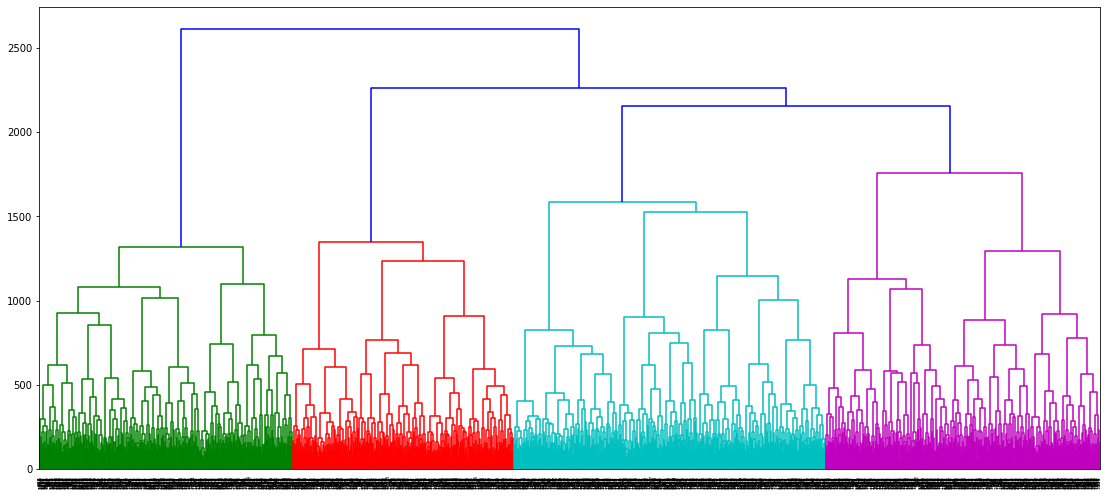

In [46]:
# get pairwise distances
dist_mat = pdist(handy_q2.drop(['Class', 'User', 'Cluster14', 'Cluster5'], axis = 1).values, metric = 'euclidean')

# perform wards linkage
ward_data = hac.ward(dist_mat)

# plot the figure
plt.figure(figsize = (19, 8.5))
hac.dendrogram(ward_data);


In [47]:
# from the plot above we cut at a height of 2000 on the y-axis;
labellings = hac.fcluster(ward_data, t = 2000, criterion = 'distance')
silhouette_score(handy_q2.drop(['Class', 'User', 'Cluster14', 'Cluster5'], axis = 1).values, labellings)


0.040781894407032414

In [56]:
# from the plot above we see try to cut at a height above 1000 on the y-axis to see if there is a change;
labellings = hac.fcluster(ward_data, t = 1000, criterion = 'distance')
silhouette_score(handy_q2.drop(['Class', 'User', 'Cluster14', 'Cluster5'], axis = 1).values, labellings)


0.041384932497131106

In [49]:
# we proceed to test the silhouette score for a range of values 

dend_range = np.arange(450,2500,100)
silval_dend = []

for t_val in dend_range:
    labellings = hac.fcluster(ward_data, t = t_val, criterion = 'distance')
    silval_dend.append(silhouette_score(handy_q2.drop(['Class', 'User', 'Cluster14', 'Cluster5'], axis = 1).values, labellings))
    

In [50]:
# convert silhouette score to a dataframe for plotting and identify max value

dend_dict = {'distance': dend_range, 'sil_score': silval_dend}
dend_df = pd.DataFrame(dend_dict)
print(dend_df.shape)
print(dend_df.loc[dend_df['sil_score'].idxmax()])
dend_df.head()

(21, 2)
distance     450.000000
sil_score      0.071385
Name: 0, dtype: float64


,distance,sil_score
0,450,0.071385
1,550,0.061625
2,650,0.053380
3,750,0.045326
4,850,0.043637


In [51]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(ward_data, 450, criterion='distance')
len(set(clusters)) 

# max value of sil_score returns 92 clusters which seems to be an overkill

92

In [52]:
# by studing the plot above we choose a value of 1650

clusters = fcluster(ward_data, 1650, criterion='distance')
len(set(clusters)) # returns 5 clusters which seems to be more inline

5

In [53]:
print(dend_df[dend_df.distance == 1650]) # sil score for 1650 cutoff is below

    distance  sil_score
12      1650   0.043153


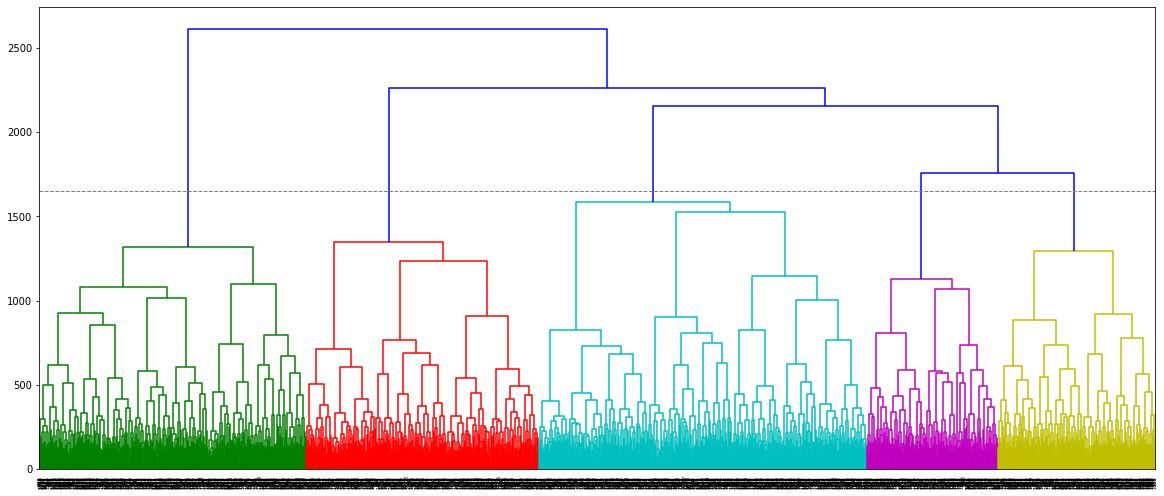

In [57]:
# plot the dendrogram again with threshold identified above
plt.figure(figsize = (20, 8.5))
hac.dendrogram(ward_data, color_threshold = 1650);
plt.axhline(y=1650, c='grey', lw=1, linestyle='dashed')


### Comment 3f

* Maximum silhouette score is 0.07 which returns 92 clusters.
* Since this seems very high given what we know of the data, we change the height to 1650
* Basis the plot we can get 5 clusters at a silhouette score of 0.043 at this level.
* This seems more inline with what we know of the data.


(g) Overall, what do you conclude about the number and kind of clusters in this data set?

### Comment 3g

* Different methods of clustering that we have seen above all point towards 5 or 14 clusters.
* For each method of clustering we get some outlier results which required further investigation.


* The evaluation metrics for any of these clustering methods are indicative and requires fair amount of judgement.


* The final clustering points to a judgement call on wether the hand motions or the users making them are dominant.
* Given the nummbers emerging from all of the above methods, I would conclude with K = 5 clusters.

In [55]:
# END